# CMPT 459 Milestone 1  
### Shayna Grose, Patrick (Phat) Nguyen, Kidjou Chang Chu

## TASK 1.1

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point

We start by reading in the 3 data sets.

In [2]:
# READING IN DATA
train = pd.read_csv("../data/cases_train.csv")
locations = pd.read_csv("../data/location.csv")
test = pd.read_csv("../data/cases_test.csv")

We then looked at the size of each data set and the number of unique values in each column.

#### Lengths of each data set
print("Number of records in training data: ", len(train))
print("Number of records in test data: ", len(test))
print("Number of records in location data: ", len(locations))

# Number of unique values in each column
print("Number of unique values in each column of training data:")
print(train.nunique())
print()
print("Number of unique values in each column of test data")
print(test.nunique())
print()
print("Number of unique values in each column of location data")
print(locations.nunique())

### TRAINING DATA

Looking at the training data first, we plotted the number of data points in each country. Split into two grpahs containing counties with more than 400 data records, and those with less.

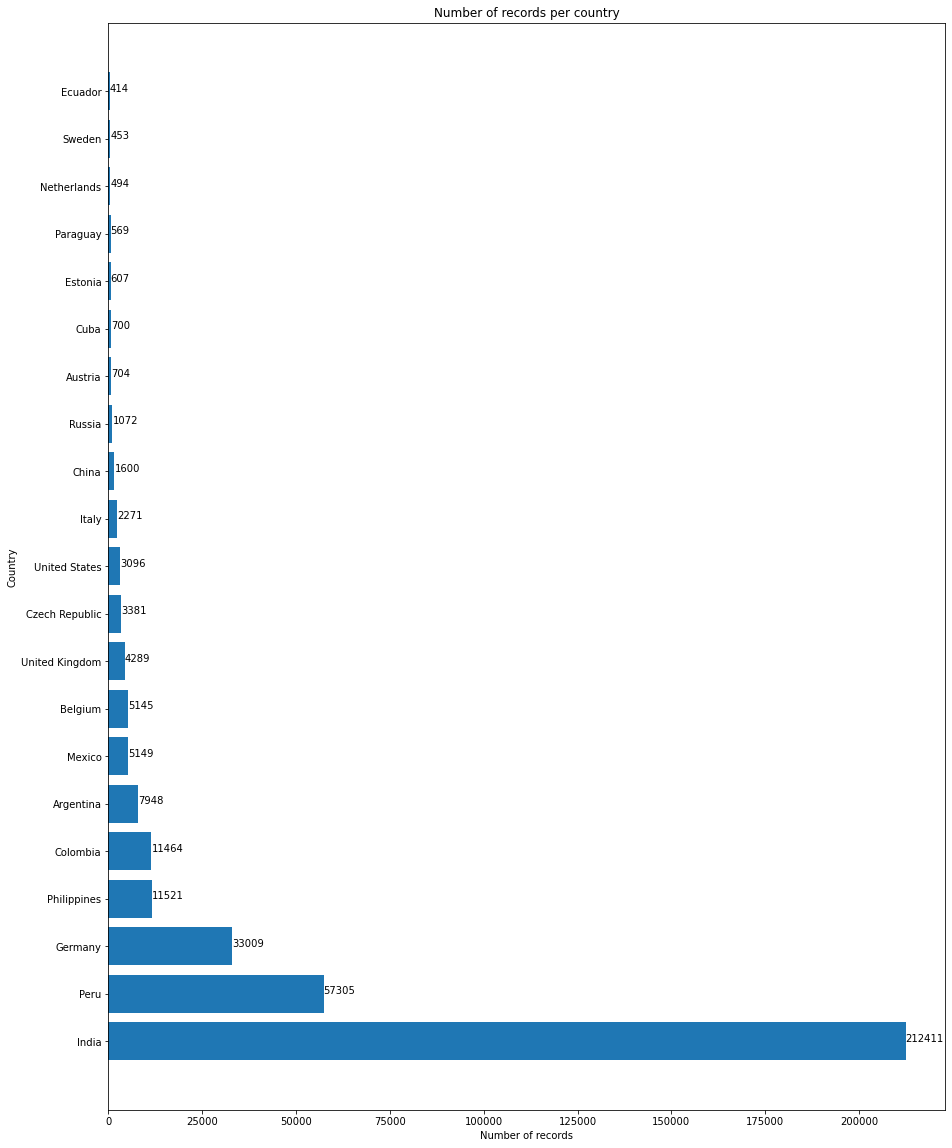

In [4]:
country = train['country'].value_counts()
country_more = country[country > 400]
country_less = country[country <= 400]
xlocs_more = [i for i in country_more.index]
ylocs_more = [i for i in country_more]
plt.figure(figsize=(15,20))
plt.barh(xlocs_more, ylocs_more)
plt.xlabel("Number of records")
plt.ylabel("Country")
plt.title("Number of records per country")
for index, value in enumerate(ylocs_more):
    plt.text(value, index, str(value))


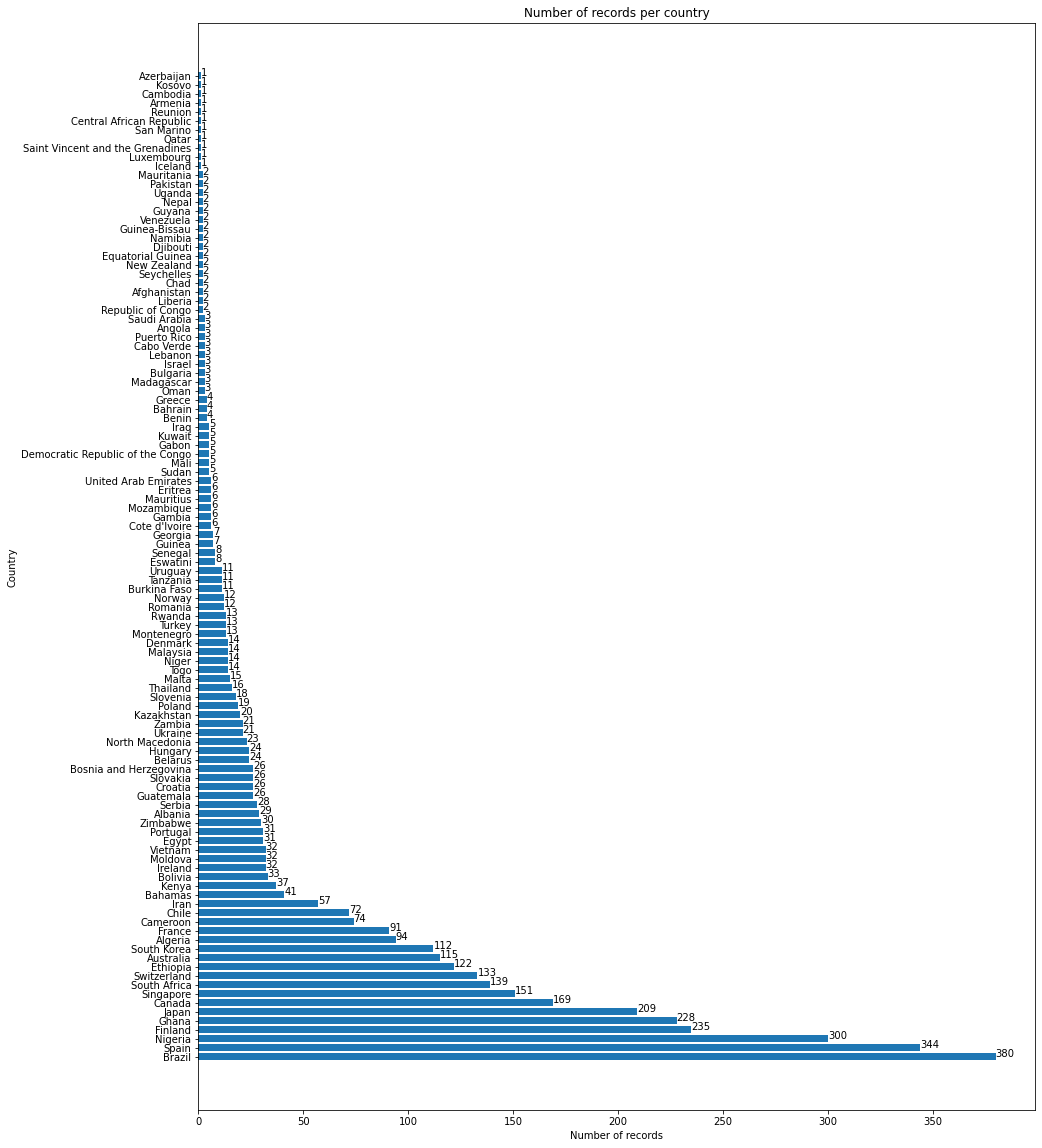

In [5]:
xlocs_less = [i for i in country_less.index]
ylocs_less = [i for i in country_less]
plt.figure(figsize=(15,20))
plt.barh(xlocs_less, ylocs_less)
plt.xlabel("Number of records")
plt.ylabel("Country")
plt.title("Number of records per country")
for index, value in enumerate(ylocs_less):
    plt.text(value, index, str(value))

We then plotted the ratio of male to female records in the data. Keep in mind that at this point we had not done any data cleaning or imputation, so there are still 207084 records missing the sex.

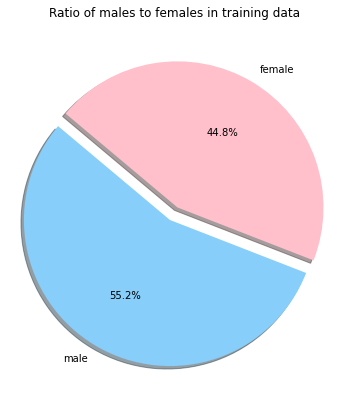

In [6]:
gender = train['sex']
gender = gender.value_counts()
xlocs = [i for i in gender.index]
ylocs = [i for i in gender]
plt.figure(figsize=(6,7))
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)
plt.pie(ylocs, explode=explode, labels=xlocs, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Ratio of males to females in training data")
plt.axis('equal')
plt.show()

To visualize the date of confirmation data we first had to convert it to proper date time format.

In [7]:
def convert_date_range(dates):
    if "-" in dates:
        beg, _ = dates.split("-")
        return beg.strip()
    else:
        return dates

# convert date ranges to single date
train['date_confirmation'] = train['date_confirmation'].apply(
    lambda x: convert_date_range(x) if isinstance(x, str) else x)
test['date_confirmation'] = test['date_confirmation'].apply(
    lambda x: convert_date_range(x) if isinstance(x, str) else x)


# convert dates to proper datetime object for easier access of components (month, day etc.)
train['date_confirmation'] = pd.to_datetime(
    train['date_confirmation'], format='%d.%m.%Y')
test['date_confirmation'] = pd.to_datetime(
    test['date_confirmation'], format='%d.%m.%Y')


Below is a visualization of the number of confirmed cases over time, from January 2020 to June 2020, since that is the only time period we have data records for.

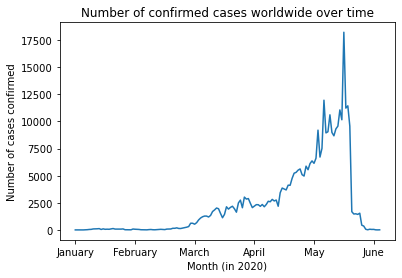

In [8]:
train['month'] = train['date_confirmation'].apply(lambda x: x.month)
train['day'] = train['date_confirmation'].apply(lambda x: x.day)

months = train.groupby(['month', 'day'])['country'].count().reset_index()

fig, ax = plt.subplots()
months['country'].plot(kind="line")
ticks = [0, 30, 60, 90, 120, 150]
ax.set_xticks(ticks)
ax.set_xlabel("Month (in 2020)")
ax.set_ylabel("Number of cases confirmed")
ax.set_title("Number of confirmed cases worldwide over time")

dic = { 0 : "January", 30 : "February", 60 : "March", 90 : "April", 120 : "May", 150 : "June"}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]

ax.set_xticklabels(labels)

plt.show()

Next we looked at the ratio of the 4 different outcomes in the training data. This column does not contain any missing values so it is an accurate representation.

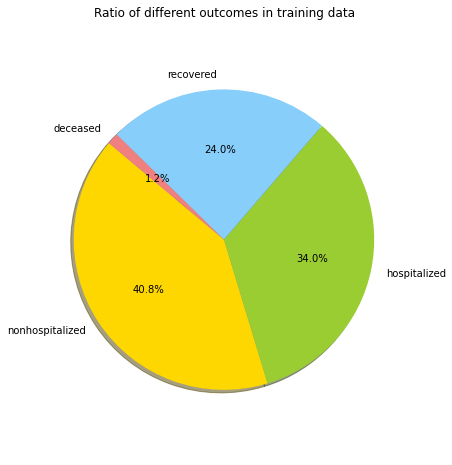

In [9]:
outcome = train['outcome']
outcome = outcome.value_counts()
xlocs = [i for i in outcome.index]
ylocs = [i for i in outcome]
plt.figure(figsize=(6,8))
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)
plt.pie(ylocs, explode=explode, labels=xlocs, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Ratio of different outcomes in training data")
plt.axis('equal')
plt.show()

Finally we plotted the longitude and latitude values of the records to get a general sense of where on the map the data records are coming from.

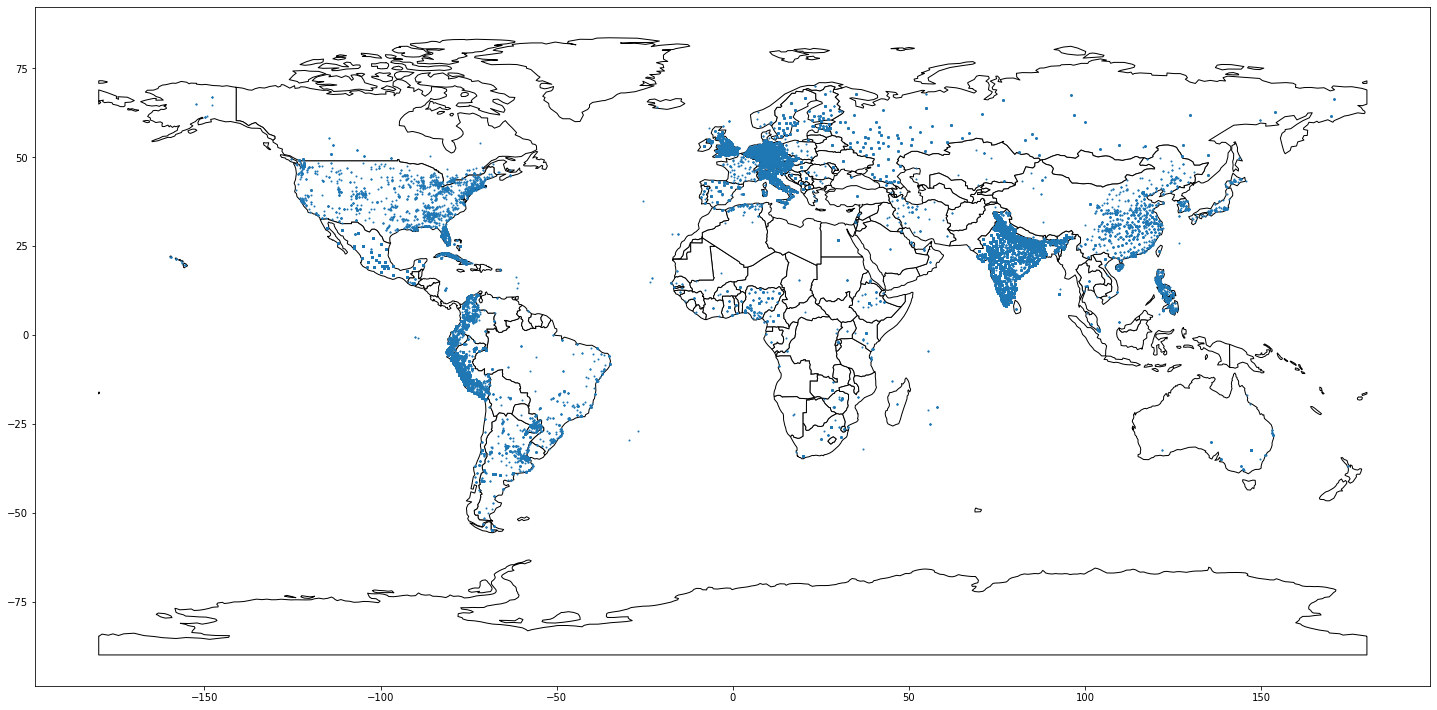

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(25,50))
geometry = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]
gdf = gpd.GeoDataFrame(train, crs="epsg:4326", geometry=geometry)
gdf.plot(ax = base, marker='o', markersize=1, figsize=(25,50))

### LOCATION DATA

We then repeated the same process for the location data set, which should have one data point per province in a country. As we can see the US has many data points since each region in a state is recorded as a separate location (which is taken care of in task 1.4)

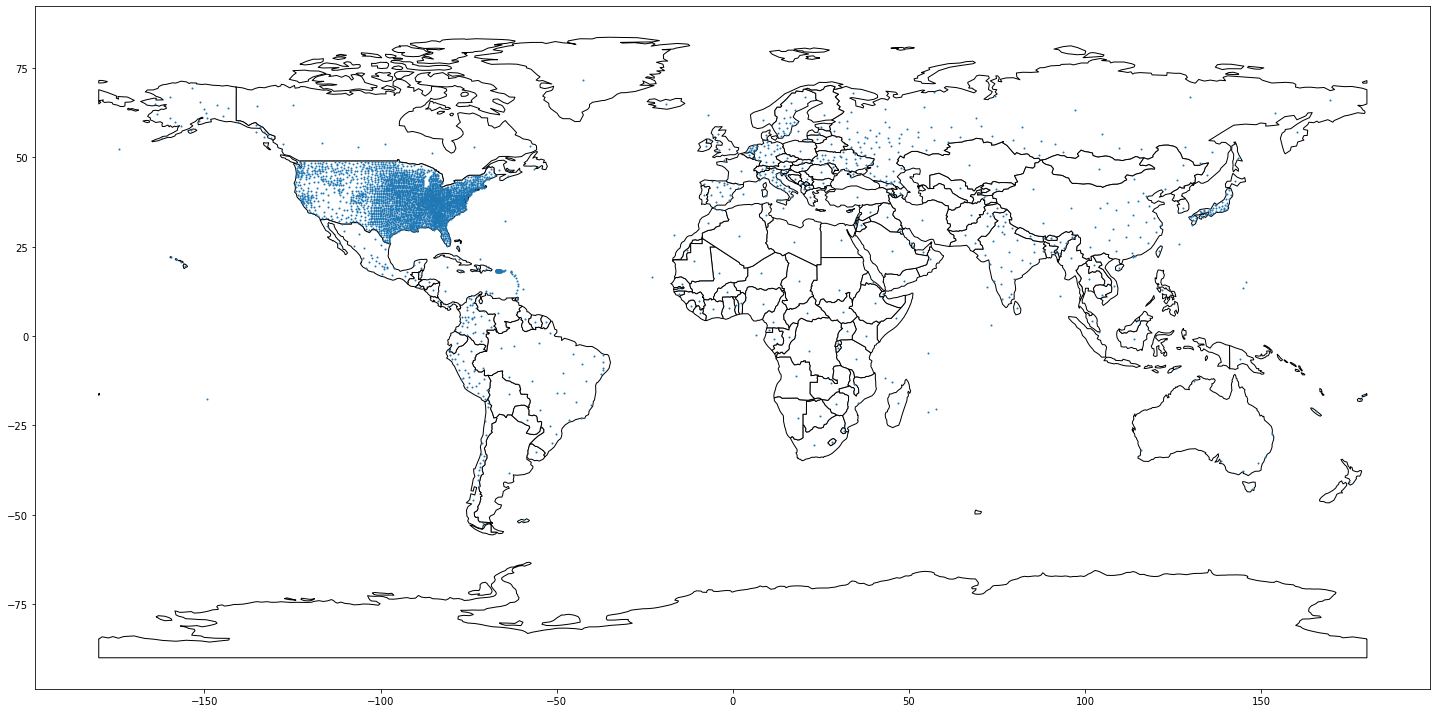

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(25,50))
geometry = [Point(xy) for xy in zip(locations['Long_'], locations['Lat'])]
gdf = gpd.GeoDataFrame(locations, crs="epsg:4326", geometry=geometry)
gdf.plot(ax = base, marker='o', markersize=1, figsize=(25,50))

Again in the location data, we plotted the number of confirmed cases in each country to get a sense of which countries have the highest number of cases.

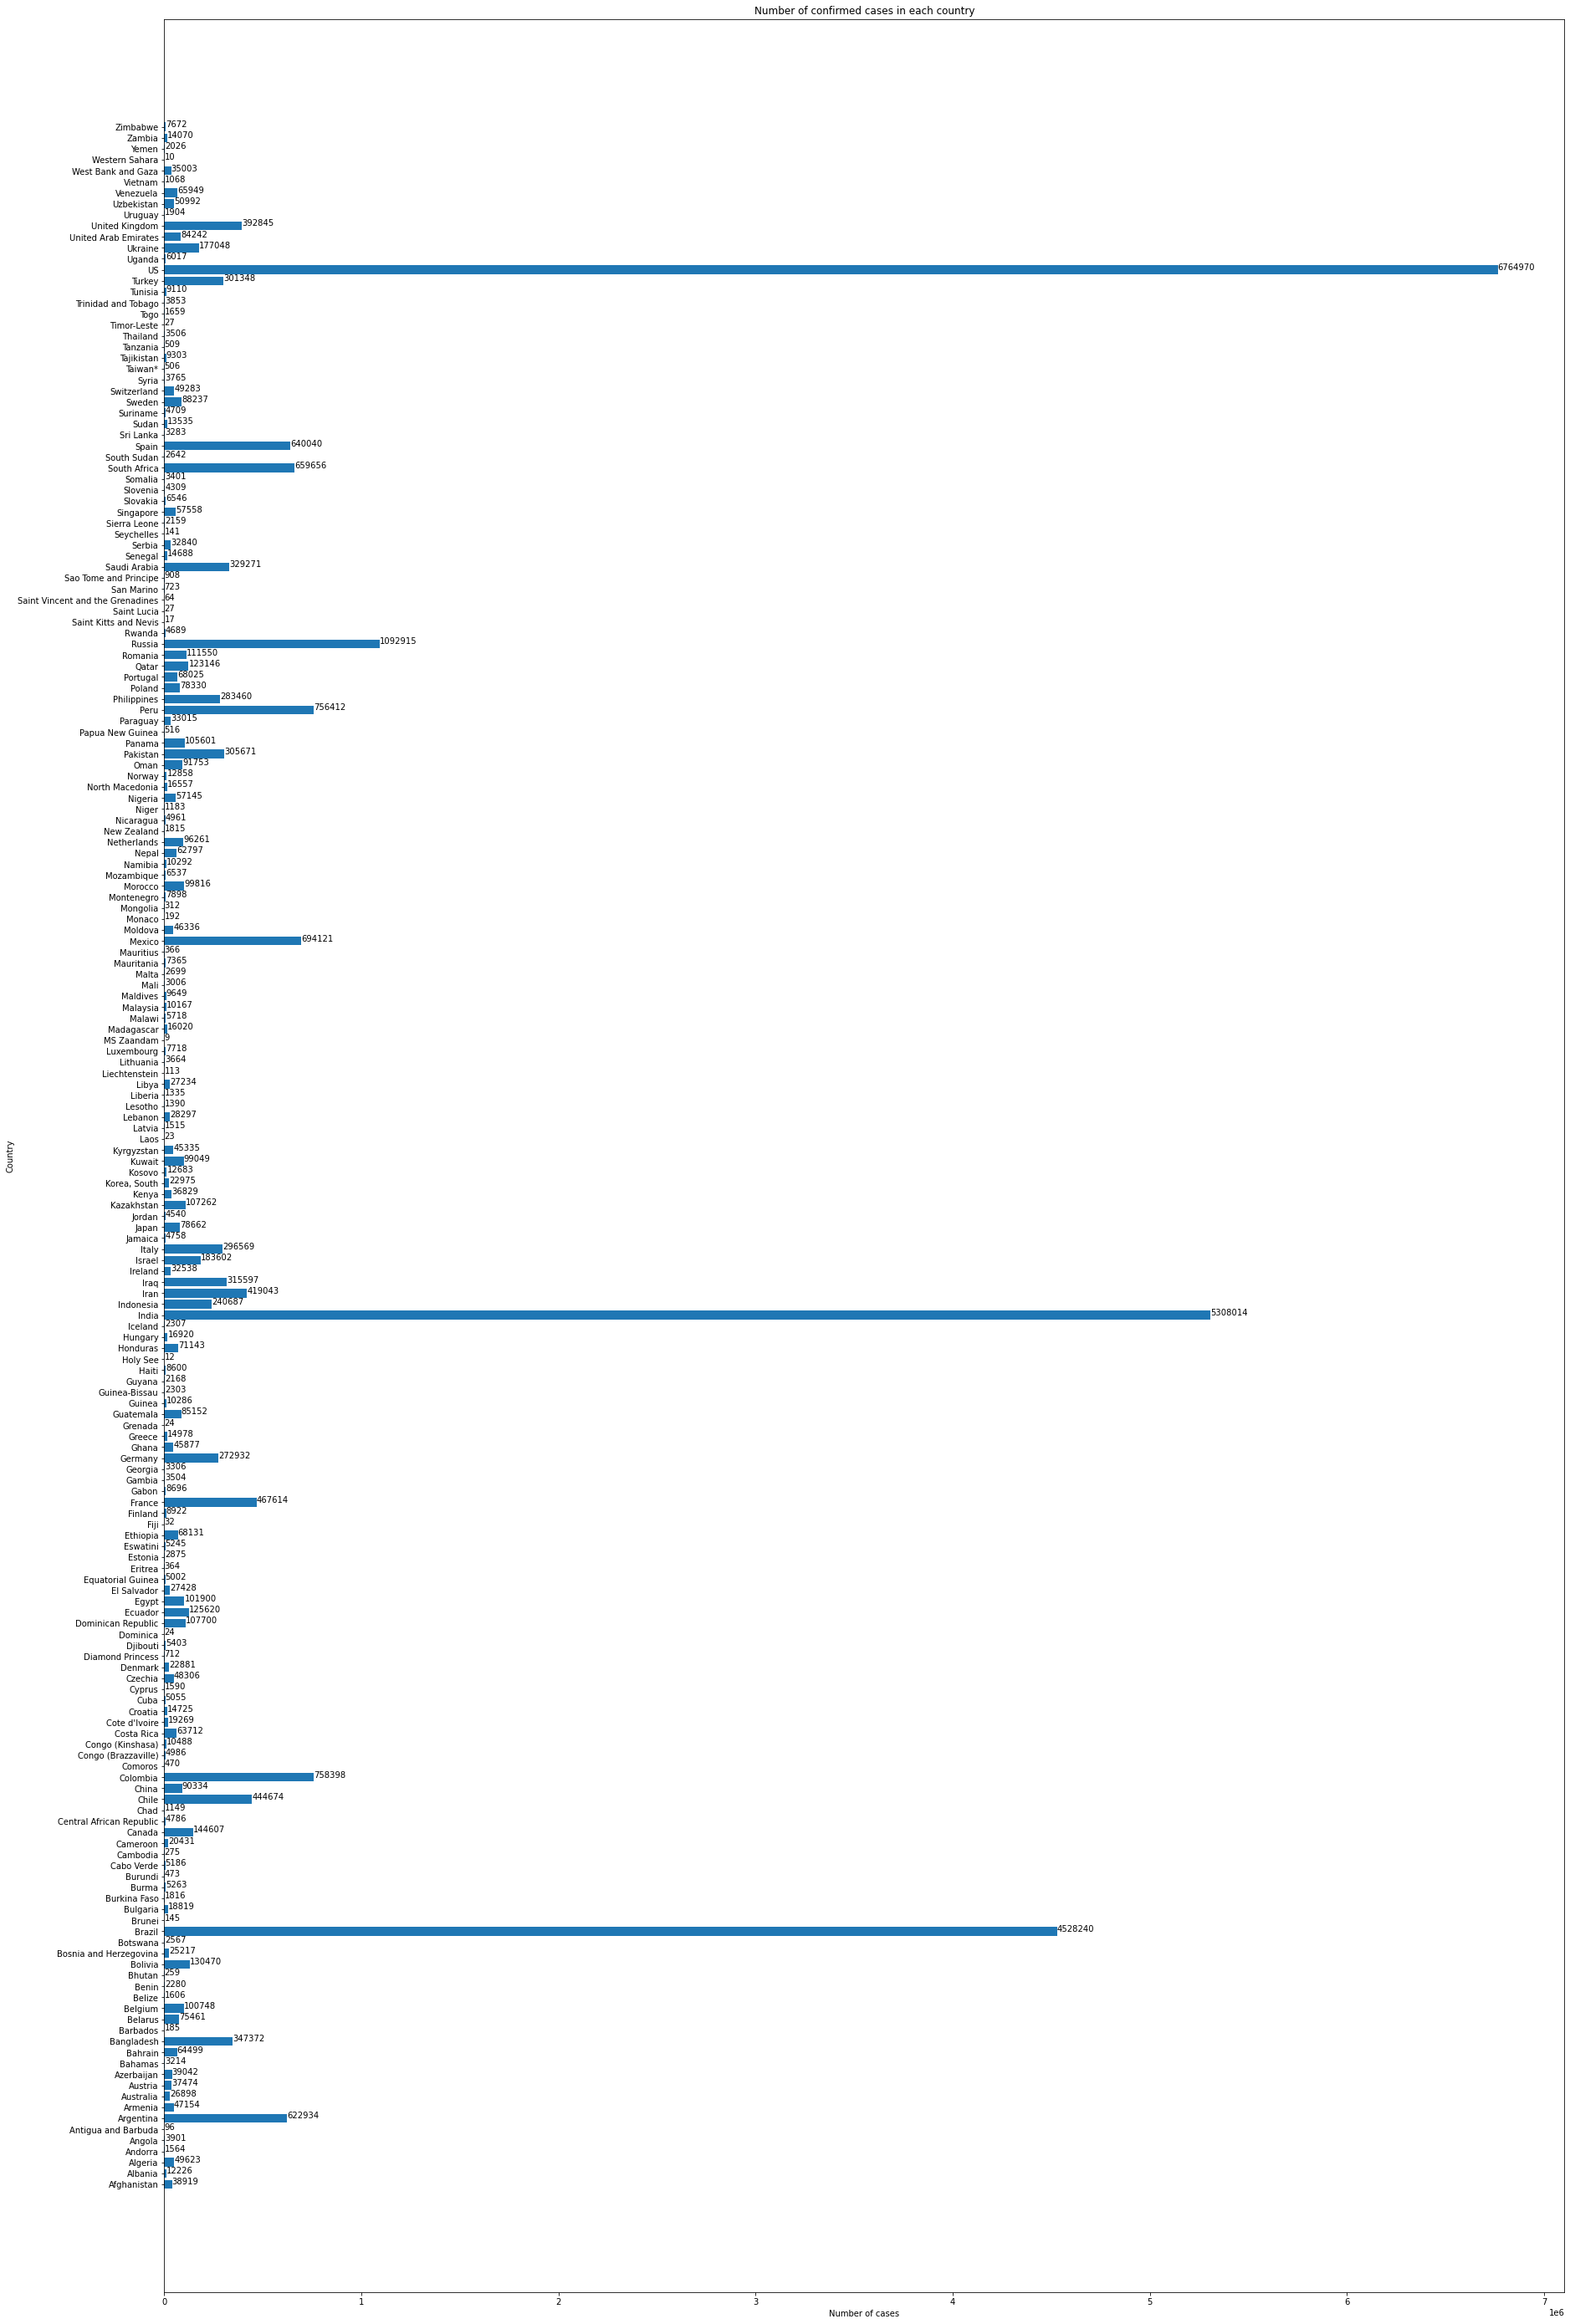

In [12]:
confirmed = locations.groupby(['Country_Region']).sum()['Confirmed']
xlocs = [i for i in confirmed.index]
ylocs = [i for i in confirmed]
plt.figure(figsize=(30,50))
plt.barh(xlocs, ylocs)
plt.title("Number of confirmed cases in each country")
plt.xlabel("Number of cases")
plt.ylabel("Country")
for index, value in enumerate(ylocs):
    plt.text(value, index, str(value))


We repeated the same thing with the number of deaths in each country, and for the most part found that countries with high number of cases tend to have more deaths.

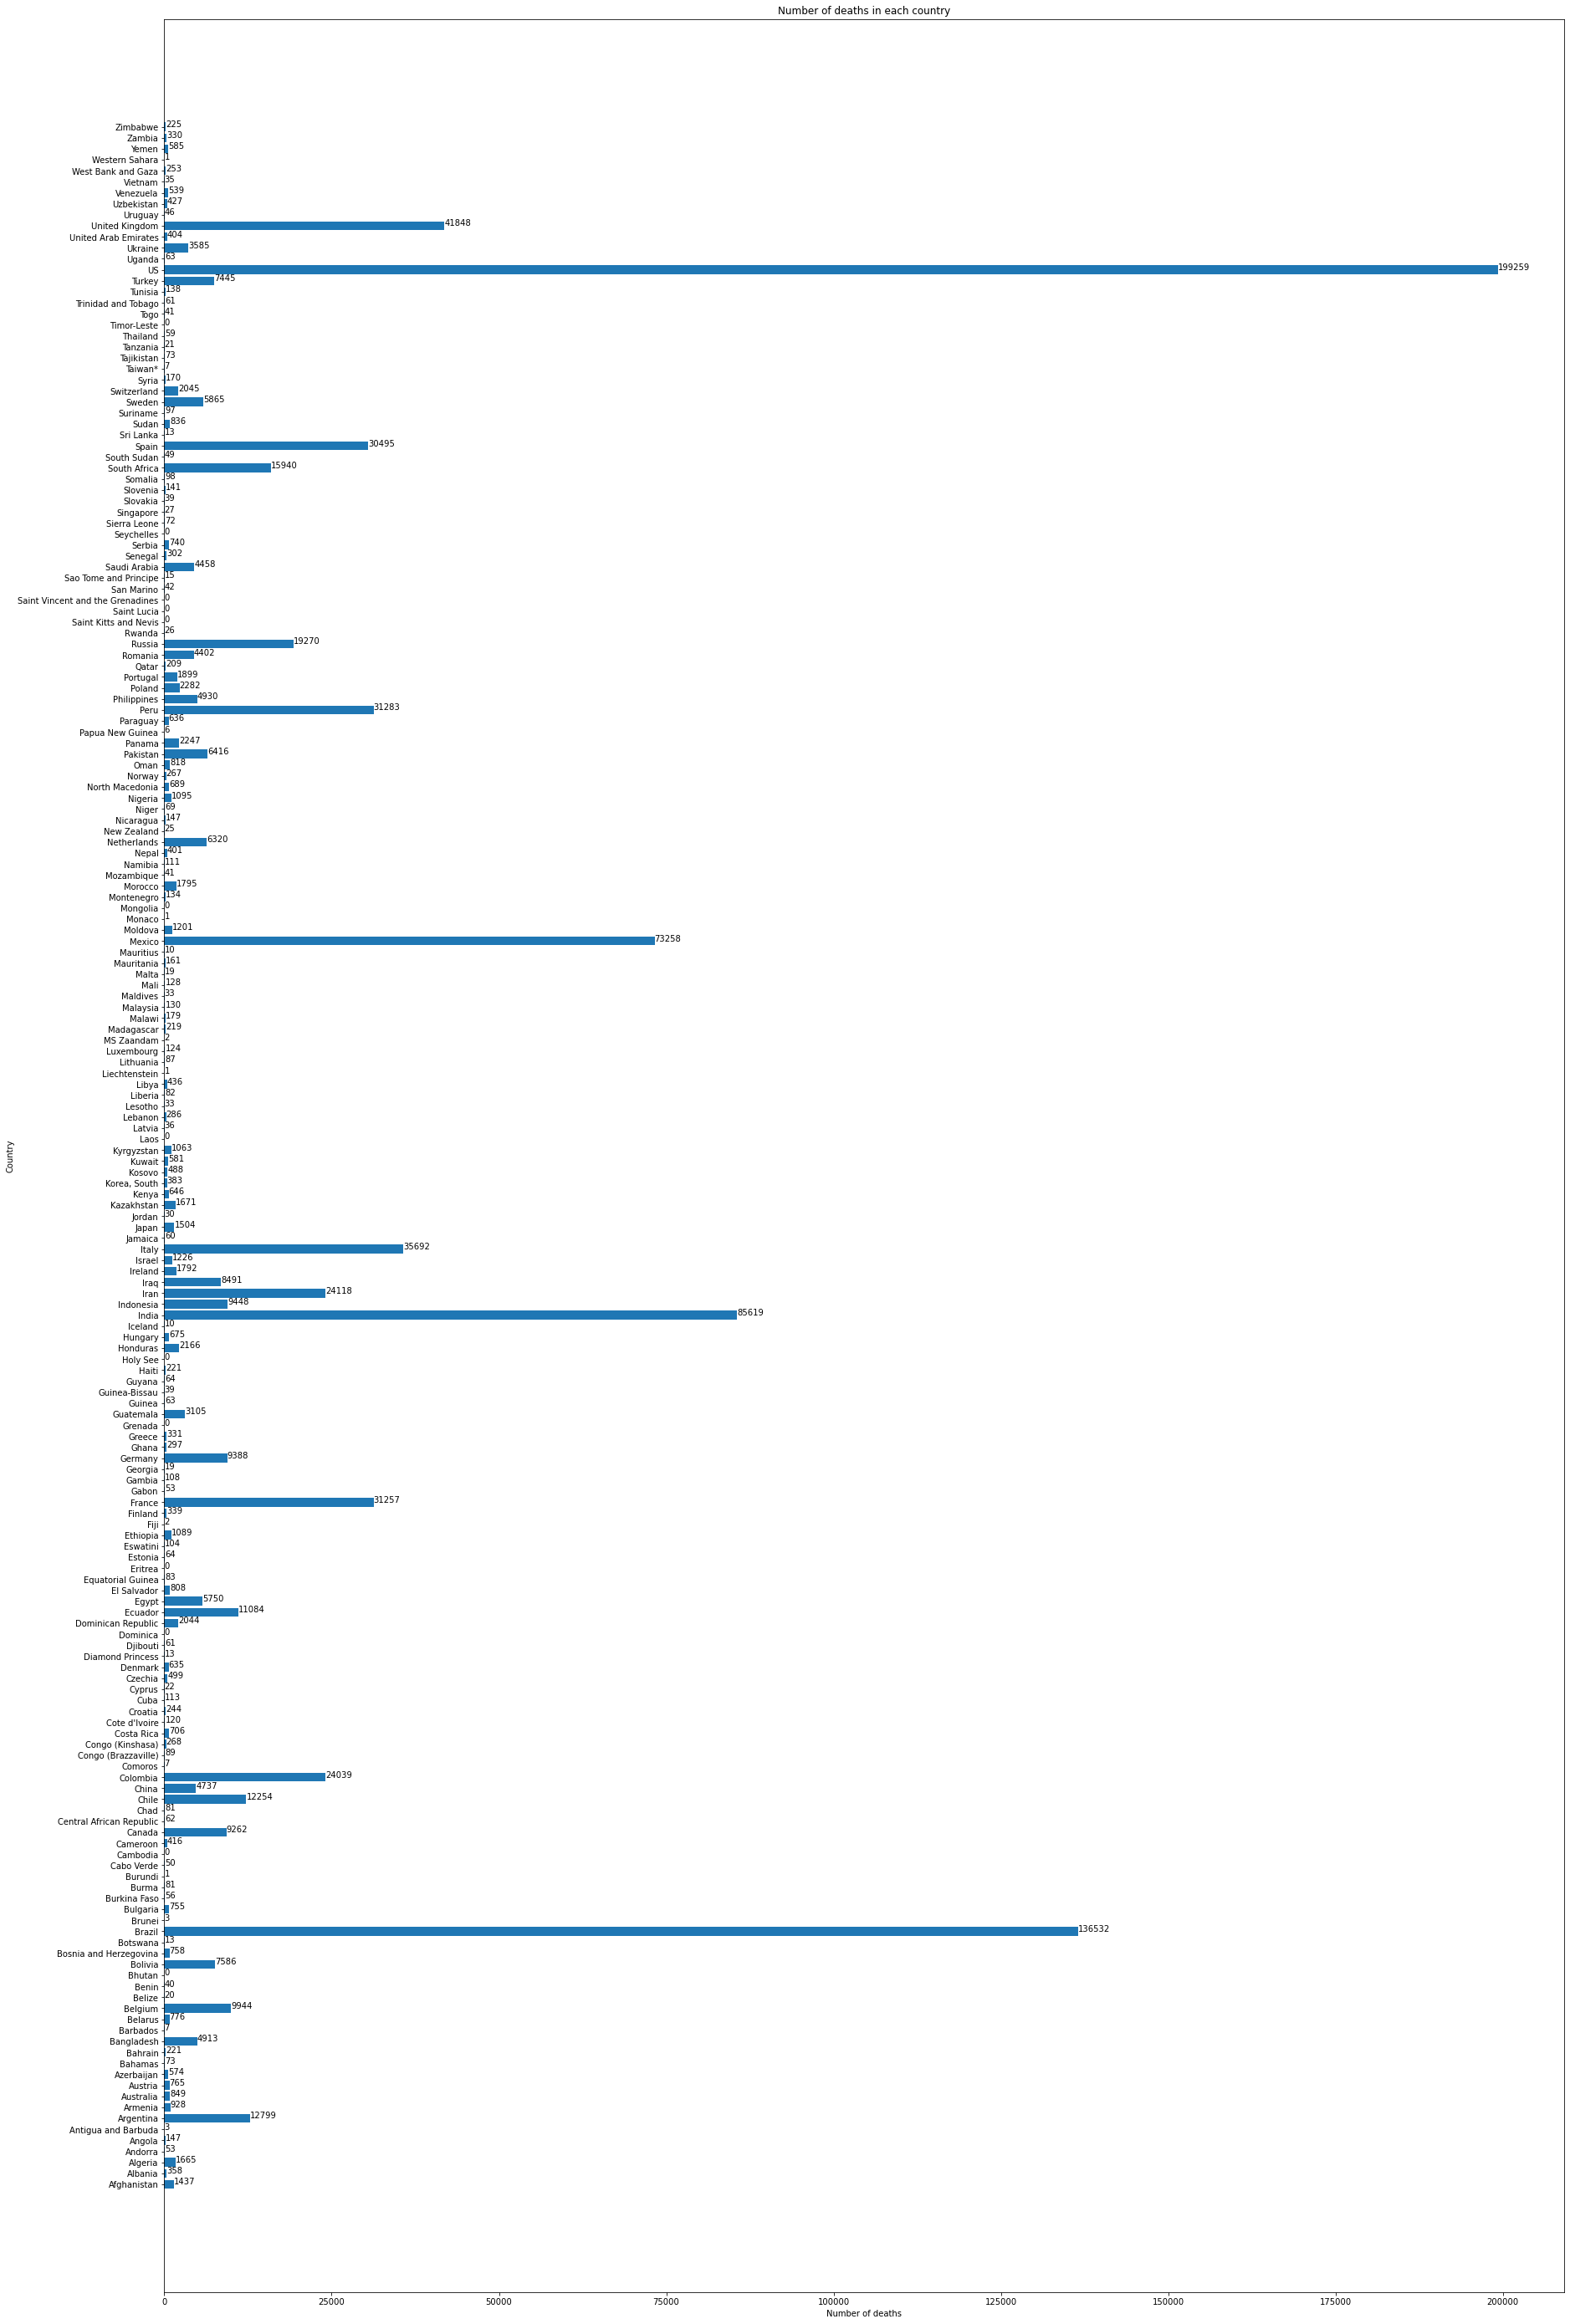

In [13]:
deaths = locations.groupby(['Country_Region']).sum()['Deaths']
xlocs = [i for i in deaths.index]
ylocs = [i for i in deaths]
plt.figure(figsize=(30,50))
plt.barh(xlocs, ylocs)
plt.title("Number of deaths in each country")
plt.xlabel("Number of deaths")
plt.ylabel("Country")
for index, value in enumerate(ylocs):
    plt.text(value, index, str(value))

In [14]:
# Number of missing values in all data sets
print("Number of missing values in test data:")
print(test.isnull().sum())
print("Number of missing values in training data:")
print(train.isnull().sum())
print("Number of missing values in location data:")
print(locations.isnull().sum())


Number of missing values in test data:
age                       25516
sex                       25199
province                    573
country                       0
latitude                      0
longitude                     0
date_confirmation            49
additional_information    43490
source                    16903
outcome                   46500
dtype: int64
Number of missing values in training data:
age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
month                        288
day                          288
geometry                       0
dtype: int64
Number of missing values in location data:
Province_State         168
Country_Region           0
Last_Update              0
Lat                